<a href="https://colab.research.google.com/github/amanichivilkar/Airbnb-Booking-Analysis/blob/main/Amani_Chivilkar_M1W4_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>
 
<b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>
 
<b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

###Import Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

### Get the Dataset path file

In [2]:
df=pd.read_csv("/content/drive/MyDrive/data/Copy of Airbnb NYC 2019.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Understanding the column of the DataFrame

 Columns of the DataFrame

* **Id-** It is listing id. Whenever a host list its property on Airbnb, a unique id is created, since every id is unique there are 458895 unique id.
As per my observation ,every listing is a listing of unique properties.(means the same property is not listed more than 1)
* **name-** It is the property description. Two properties can have the same name, but they are not the same property, every property in the data are unique, as all of them are having different longitude and latitude, that means every properties are situated in different location. 
* **host_id-** Its the identity id given to individual host (For example- two different host cant have the same host_id). So if we want to count the number of host, we count the unique host_id.
* **neighbourhood_group-** This are the 5 Boroughs of New York city, in which the property is located.
* **neighbourhood-**  This are the towns and villages in New York
* **room_type-** Types of properties 
* **price-**  Property price per day
* **minimum_nights-** It is the minimum number of night you can book a property,( example-1 year rental contract)
* **number_of_reviews-** Total number of reviews 
* **Calculated_host_listing_count-** The number of times the host has listed its property.
* **availabilitty_365-** the number of days the property were available for booking.

## **Cleaning the data**



### **Check how many NaN values are present in each columns**

In [3]:
 df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


* Drop the column which are not required,like id, last_review  
* Since 2 different host can have the same host_name, we use host_id , as host id is unique for induvidual host


In [4]:
df.drop(['id'],axis=1,inplace=True)

###  **Fill the NaN values in host_name by 'no name'**

In [5]:
df.loc[df.host_name.isna(),'host_name']=df.loc[df.host_name.isna(),'host_name'].apply(lambda x: "no name")

### **Replace NaN values in 'name' column by 'no description'**

In [6]:
df.loc[df.name.isna(),'name']=df.loc[df.name.isna(),'name'].apply(lambda x: "no description")

### **Replace NaN values in 'reviews_per_month' column by 0**

In [7]:
df.loc[df.reviews_per_month.isna(),'reviews_per_month']=df.loc[df.reviews_per_month.isna(),'reviews_per_month'].apply(lambda x: 0)

### **If price is 0 , replace it by the average price of all similar room_type with similar neighbourhood_group**





In [8]:
#Considering 3 column of the dataframe df
df1=df[['neighbourhood_group','room_type','price']]

#Create dataframe df2 containig price greater than zero
df2=df1[df1.price!=0]

# groupby neighbourhood_group and room_type, And find there average price 
df3=df2.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
df3

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.346202,76.545428,50.773723
Manhattan,249.257994,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [9]:
# Creat function to extract average price from dataframe df3
def fun(neighbourhood_group,room_type):
 avg_price=df3.loc[neighbourhood_group,room_type]
 return avg_price

In [10]:
# Repllace 0 price by the average price from the dataframe df3
df['price']=df.apply(lambda x: fun(x['neighbourhood_group'],x['room_type'])  if x['price']==0 else x['price'], axis=1 )

### **Convert timestring to datetime**

In [11]:
df.loc[~df['last_review'].isna(),'last_review']=df.loc[~df['last_review'].isna(),'last_review'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

###  **Check how many NaN values are present in each columns**

In [12]:
# check the nan values
df.isnull().sum()

name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## **EDA and Visualization Analysis**

**define busiest host**
I would consider the host to be busy, if he frequently receives bookings (that is if the host recives booking  in higher rate).
Since we have not been provided with the booking data, we can consider the number of reviews received  by the host as the minimum number of booking that a host could get. (since the tenants gives review after booking/using the property)

* host with maximum number of reviews is not busiest, but host with max number of reviews per month is the busiest.
* For example host1 gets 10 booking per month is more busier than the host2 who gets 2 booking per month. 
* In the given data Maya has the highest number of reviews that is 2273 reviews. but the rate of reviews is 53 reviews per month, where as Soder got 1281 reviews , and the rate of reviews is 397 reviews per month , means Sonders booking rate is more than Maya hence Sonder is the busiest among all. 

### **Find the rate of reviews per month, recieved by each host for all its properties (combined) listed on Airbnb**

In [13]:
#Create new column 'reviews_in_days'
df['reviews_in_days']=(df.number_of_reviews/df.reviews_per_month)*31 # This calculation gives reviews_in_month, we multiply it by 31 to get reviews in days 

In [14]:
# considerng the following columns only from the original dataframe
df1=df[['host_id','host_name','number_of_reviews','last_review','reviews_in_days']]
df1.dropna(inplace=True)
df1.head()

,host_id,host_name,number_of_reviews,last_review,reviews_in_days
0,2787,John,9,2018-10-19 00:00:00,1328.571429
1,2845,Jennifer,45,2019-05-21 00:00:00,3671.052632
3,4869,LisaRoxanne,270,2019-07-05 00:00:00,1803.879310
4,7192,Laura,9,2018-11-19 00:00:00,2790.000000
5,7322,Chris,74,2019-06-22 00:00:00,3888.135593


In [15]:
#Convert reviews_in_days columns into deltatime and store it in a
a=pd.to_timedelta(df1['reviews_in_days'], unit='D')

In [16]:
#create new column "first_review" that stors the date of the first review
df1['first_review']=df1['last_review']-a
df1.head()

,host_id,host_name,number_of_reviews,last_review,reviews_in_days,first_review
0,2787,John,9,2018-10-19 00:00:00,1328.571429,2015-02-28 10:17:08.571465600
1,2845,Jennifer,45,2019-05-21 00:00:00,3671.052632,2009-05-01 22:44:12.631574400
3,4869,LisaRoxanne,270,2019-07-05 00:00:00,1803.879310,2014-07-27 02:53:47.586192000
4,7192,Laura,9,2018-11-19 00:00:00,2790.000000,2011-03-31 00:00:00.000000000
5,7322,Chris,74,2019-06-22 00:00:00,3888.135593,2008-10-28 20:44:44.745792001


In [17]:
# groupby host id and find out the min of the first_review and max of the last_review and sum up all the number of reviews recieved by each host for all its properties
df2=df1.groupby(['host_id','host_name']).agg({'number_of_reviews':'sum','first_review':np.min,'last_review':np.max}).reset_index().rename(columns={'number_of_reviews':'total_reviews'})
df2.head()

,host_id,host_name,total_reviews,first_review,last_review
0,2438,Tasos,1,2016-10-16 07:59:59.999971200,2018-03-17
1,2571,Teedo,27,2013-03-10 20:06:29.189203200,2019-05-21
2,2787,John,105,2015-02-28 10:17:08.571465600,2019-06-26
3,2845,Jennifer,46,2009-05-01 22:44:12.631574400,2019-05-21
4,2868,Letha M.,2,2014-10-01 16:00:00.000028800,2017-07-31


In [18]:
# df1['total_days_of_reviews']=df1['first_review']-df1['last_review']
df2['Difference'] = df2['last_review'].sub(df2['first_review'], axis=0)
# Ectract days from Difference(datetime) column
df2['Difference'] = df2['Difference'].apply(lambda x: x.days)
# This dfference is in days we convert it into months by dividing it by 31days
df2['Difference'] = df2['Difference']/31
df2.rename(columns={'Difference':'Difference_in_months'},inplace=True)
df2.head()

,host_id,host_name,total_reviews,first_review,last_review,Difference_in_months
0,2438,Tasos,1,2016-10-16 07:59:59.999971200,2018-03-17,16.645161
1,2571,Teedo,27,2013-03-10 20:06:29.189203200,2019-05-21,72.967742
2,2787,John,105,2015-02-28 10:17:08.571465600,2019-06-26,50.903226
3,2845,Jennifer,46,2009-05-01 22:44:12.631574400,2019-05-21,118.419355
4,2868,Letha M.,2,2014-10-01 16:00:00.000028800,2017-07-31,33.322581


In [19]:
# rate of reviews per month, recieved by each host for all its properties (combined) listed on Airbnb
df2['total_reviews_per_month']=(df2.total_reviews/df2.Difference_in_months)
df6=df2.sort_values('total_reviews_per_month', ascending=False).head()
df6

,host_id,host_name,total_reviews,first_review,last_review,Difference_in_months,total_reviews_per_month
28219,219517861,Sonder (NYC),1281,2018-12-12 10:25:27.272697600,2019-06-26,6.290323,203.646154
29173,244361589,Row NYC,305,2019-02-24 02:39:59.999990400,2019-07-07,4.258065,71.628788
28855,232251881,Lakshmee,482,2018-12-08 12:36:24.110265600,2019-07-07,6.774194,71.152381
15369,26432133,Danielle,2017,2016-10-14 22:07:35.018630400,2019-07-08,32.129032,62.778112
25212,137274917,David,607,2018-06-21 02:37:25.659177600,2019-06-24,11.838710,51.272480


In [20]:
df1=df[(df.host_id==219517861)|(df.host_id==244361589)|(df.host_id==232251881)|(df.host_id==26432133)|(df.host_id==137274917)]

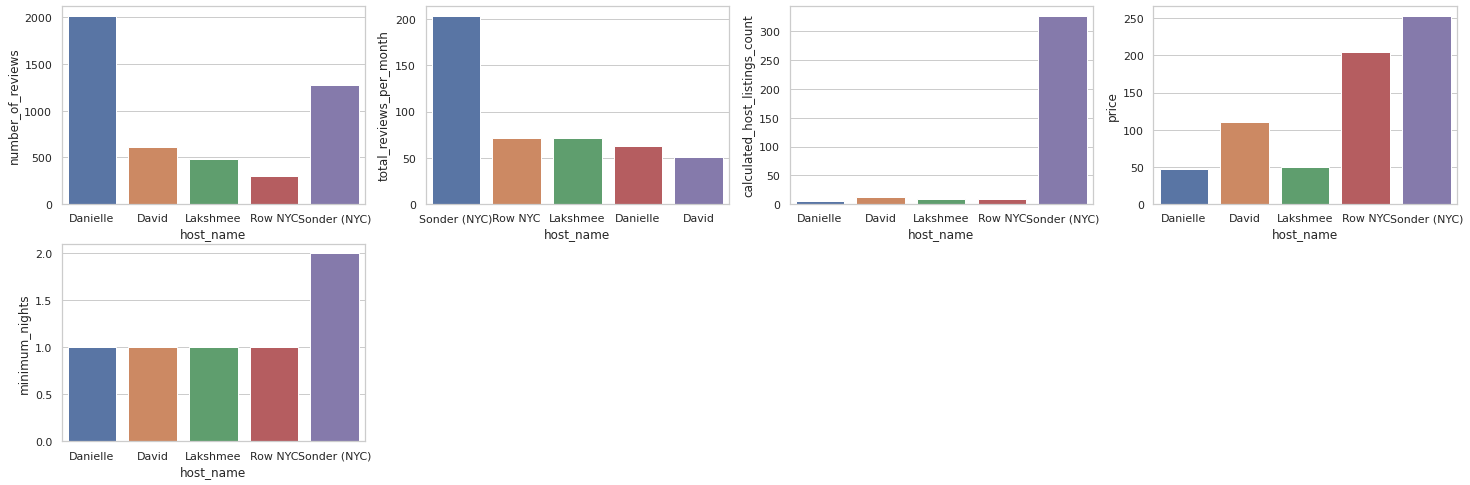

In [21]:
df2=df1.groupby(['host_name'])['calculated_host_listings_count'].count().reset_index()
df3=df1.groupby(['host_name'])['number_of_reviews'].sum().reset_index()
df4=df1.groupby(['host_name'])['minimum_nights'].median().reset_index()
df5=df1.groupby(['host_name'])['price'].mean().reset_index()


plt.figure(figsize=(25,8))

plt.subplot(2,4,3)
sns.barplot(x=df2.host_name, y=df2.calculated_host_listings_count)

plt.subplot(2,4,2)
sns.barplot(x=df6.host_name, y=df6.total_reviews_per_month)

plt.subplot(2,4,1)
sns.barplot(x=df3.host_name, y=df3.number_of_reviews)

plt.subplot(2,4,5)
sns.barplot(x=df4.host_name, y=df4.minimum_nights)

plt.subplot(2,4,4)
sns.barplot(x=df5.host_name, y=df5.price)

* Sonder has the highest review per month, highest listing count, and most of his properties are in Manhattan which is the most densely populated among the 5 boroughs of New York city. Hence Sonder is the busiest host.

* Most of his properties are entire home/apt, with an average price of 251$ and the minimum_night stay is 2 nights.

### **Top 5 host with heights listing counts**

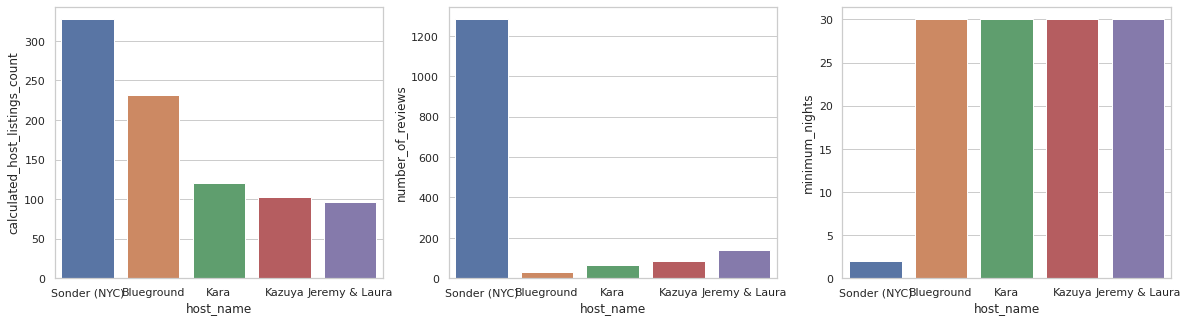

In [22]:
#Top 5 host with max number of listing
df1=df.groupby(['host_id','host_name']).agg({'calculated_host_listings_count':'count','number_of_reviews':'sum','minimum_nights':'median'}).reset_index().sort_values('calculated_host_listings_count', ascending=False).head()

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(x=df1.host_name, y=df1.calculated_host_listings_count)

plt.subplot(1,3,2)
sns.barplot(x=df1.host_name, y=df1.number_of_reviews)

plt.subplot(1,3,3)
sns.barplot(x=df1.host_name, y=df1.minimum_nights)

* Inspite of Blueground having the second highest review, he has got very less reviews among all, that is because the minimum night required to book Blueground's property is 30 nights. where as for Sonder is 2 nights.

* Scatterplot  below shows the relation between minimum_nights and total_reviews of all the host

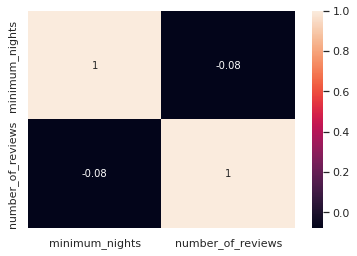

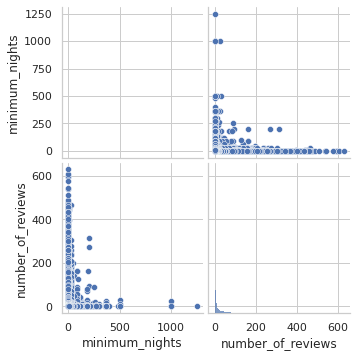

In [23]:
h=df[['minimum_nights','number_of_reviews']]
corr_h=h.corr()
sns.heatmap(corr_h,annot=True)
sns.pairplot(h)

### ***Number and Percentage of Properties, listed on Airbnb***

[Text(0.5, 1.0, 'Number of different property types in different neighbourhood_group')]

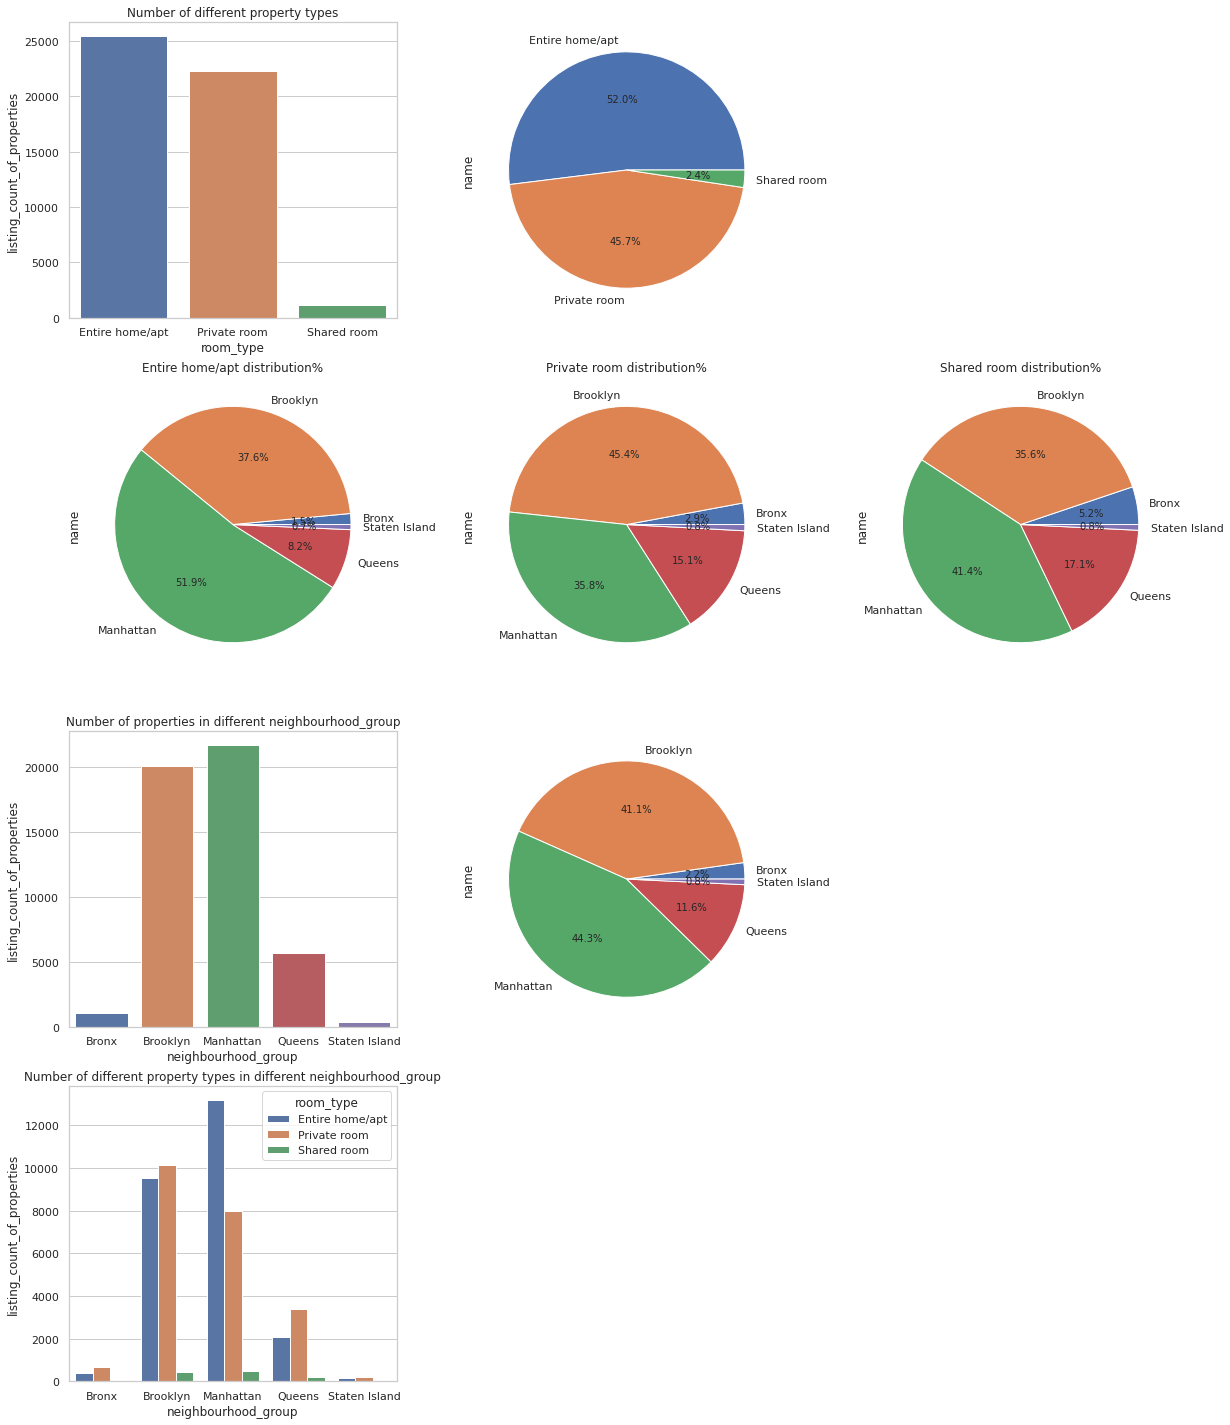

In [24]:
 
plt.figure(figsize=(20,25))
 
df1=df.groupby(['room_type'])['name'].count().reset_index().rename(columns={'name':'listing_count_of_properties'})
df7=df.groupby(['room_type'])['name'].count()
df4=df.groupby(['neighbourhood_group'])['name'].count().reset_index().rename(columns={'name':'listing_count_of_properties'})
df5=df.groupby(['neighbourhood_group'])['name'].count()
df6=df.groupby(['neighbourhood_group','room_type'])['name'].count().reset_index().rename(columns={'name':'listing_count_of_properties'})
 
plt.subplot(4,3,1)
sns.barplot(x=df1.room_type, y=df1.listing_count_of_properties).set(title='Number of different property types')
plt.subplot(4,3,2)
df7.plot.pie(autopct="%.1f%%")
 
i=4
for room in ['Entire home/apt','Private room', 'Shared room']:
  df2=df[df.room_type==room] 
  df3=df2.groupby(['neighbourhood_group'])['name'].count()
 
  plt.subplot(4,3,i)
  plt.title(f'{room} distribution%')
  df3.plot.pie(autopct="%.1f%%")
  i=i+1
 
plt.subplot(4,3,7)
sns.barplot(x=df4.neighbourhood_group, y=df4.listing_count_of_properties).set(title='Number of properties in different neighbourhood_group')
plt.subplot(4,3,8)
df5.plot.pie(autopct="%.1f%%")

 
plt.subplot(4,3,10)
sns.barplot(x=df6.neighbourhood_group, y=df6.listing_count_of_properties, hue=df6.room_type).set(title='Number of different property types in different neighbourhood_group')

* Entire home/apt is highest room type listed on Airbnb , Where as Shared room is the second highest room_type listed on Airbnb.
The least room_type is the sharedroom , which is about 2.2% of the entire properties listed on Airbnb.
* Manhattan is the smallest neighborhood_group, but has about 
44% of the properties listed on Airbnb, that's because it is densely populated city of New York.
* The maximum number of Entire home/apt listed on Airbnb are situated in Manhattan, maximum number of Private room are situated in Brooklyn, second highest number of Private room are situated situated in Manhattan.
Staten Island and Bronx has the very less number properties. 
* Out of all the properties situated in Staten Island, only 5.5% of the properties are Shared room and Out of all the properties situated in Bronx, only 2.2% of the properties are Shared room

### ***Average price of Properties***

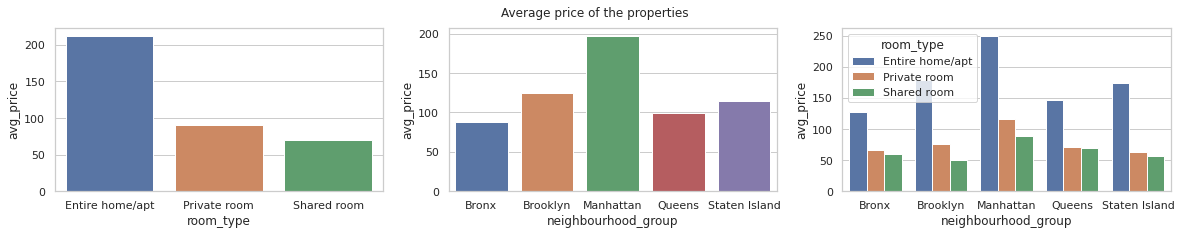

In [25]:
df1=df.groupby(['room_type'])['price'].mean().reset_index().rename(columns={'price':'avg_price'})
df2=df.groupby(['neighbourhood_group'])['price'].mean().reset_index().rename(columns={'price':'avg_price'})
df3=df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index().rename(columns={'price':'avg_price'})

fig, ax=plt.subplots(1,3,figsize=(20,3))
fig.suptitle('Average price of the properties') 

sns.barplot(ax=ax[0],x=df1.room_type, y=df1.avg_price)
# ax[0].set_title('Avg price of different room_type in different neighbourhood_group')
 
sns.barplot(ax=ax[1],x=df2.neighbourhood_group, y=df2.avg_price)
# ax[1].set_title('Avg price of different room_type in different neighbourhood_group')

sns.barplot(ax=ax[2],x=df3.neighbourhood_group, y=df3.avg_price, hue=df3.room_type)
# ax[2].set_title('Avg price of different room_type in different neighbourhood_group')


* Entire home/apt is costly than other room_type and shared_room is cheaper.

* Properties in Manhattan are costly as compared to other neighbourhoo_group. Properties in Bronx and Queens are cheaper

* The avg price of shared room and Private room in Staten Island ,Queens and Bronx are almost same.

In [26]:
display(df1),display(df2),display(df3)

,room_type,avg_price
0,Entire home/apt,211.811075
1,Private room,89.804540
2,Shared room,70.215127


,neighbourhood_group,avg_price
0,Bronx,87.558104
1,Brooklyn,124.419974
2,Manhattan,196.887321
3,Queens,99.517649
4,Staten Island,114.812332


,neighbourhood_group,room_type,avg_price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.890937
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.346202
4,Brooklyn,Private room,76.545428
5,Brooklyn,Shared room,50.773723
6,Manhattan,Entire home/apt,249.257994
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


(None, None, None)

###***Overall Correlation with Price***

 Check weather 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365' has any correlation with price

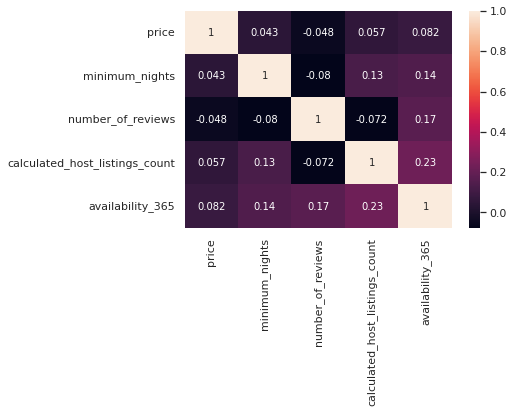

In [27]:
df1=df[['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
corr_df1=df1.corr()
sns.heatmap(corr_df1,annot=True)
# sns.pairplot(df1)

* we see that most of the host who has listed morethan 20 times , has set the a cheaper price for their properties, where as host who has listed least number of times, has set higher price for their properties. 

* Most of the properties with cheaper price ,often gets more number of reviews as compare to the properties with higher price. That is maybe because people prefer renting cheaper property, which leads to more reviews and 

* less minimum nights, higher is the number of review . 
This is because if a host gets rental for his properties, for 60 days, then he  will not get booking for atleast 60 days, he gets atmost 1 review within 6 month. 
And the host who has set minimum_nights as 2 will get atleast 1 booking within 6 months, hence he will get atleast 1 review with in 6 months

* Most of the properties with less  minimum nights ,has higher price, So booking a property that has maximum minimum nights  will be cheaper .

* number_of_reviews is negativly correlated with host listing count, this doesn't make sense

### **Availability percentage of properties in different neighbourhood_group**

In [28]:
df2=df.groupby(['neighbourhood_group','room_type'])['availability_365'].apply(lambda x: (x.sum()*100)/(365*x.count())).reset_index()
df2.head()

,neighbourhood_group,room_type,availability_365
0,Bronx,Entire home/apt,43.287671
1,Bronx,Private room,46.940079
2,Bronx,Shared room,42.251142
3,Brooklyn,Entire home/apt,26.631547
4,Brooklyn,Private room,27.374790


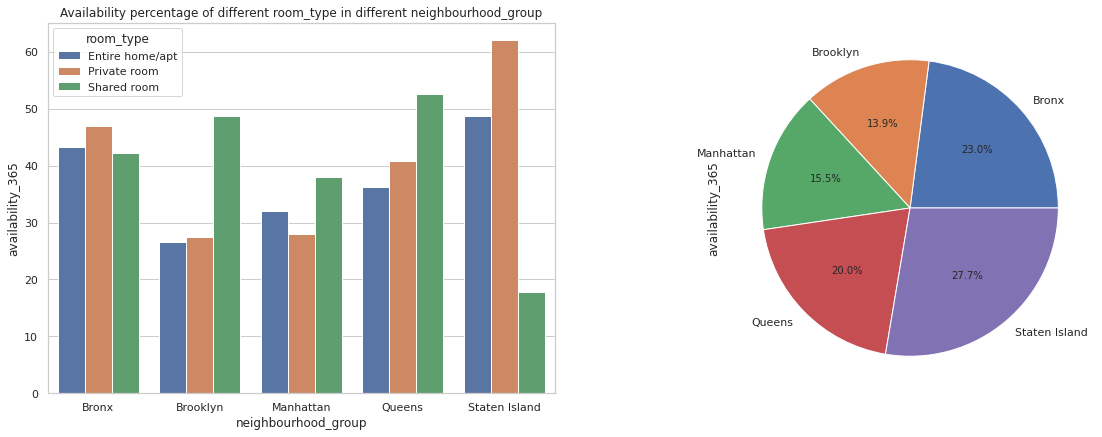

In [29]:
plt.figure(figsize=(20,15))
df1=df.groupby(['neighbourhood_group'])['availability_365'].apply(lambda x: (x.sum()*100)/(365*x.count()))
df2=df.groupby(['neighbourhood_group','room_type'])['availability_365'].apply(lambda x: (x.sum()*100)/(365*x.count())).reset_index()

plt.subplot(2,2,1)
sns.barplot(x=df2.neighbourhood_group, y=df2.availability_365, hue=df2.room_type).set(title='Availability percentage of different room_type in different neighbourhood_group')
plt.subplot(2,2,2)
df1.plot.pie(autopct="%.1f%%")